In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline  

## Load data

In [2]:
data = (np.load('data_to_train_on.npy')).astype(np.float32).reshape(2,28,28)

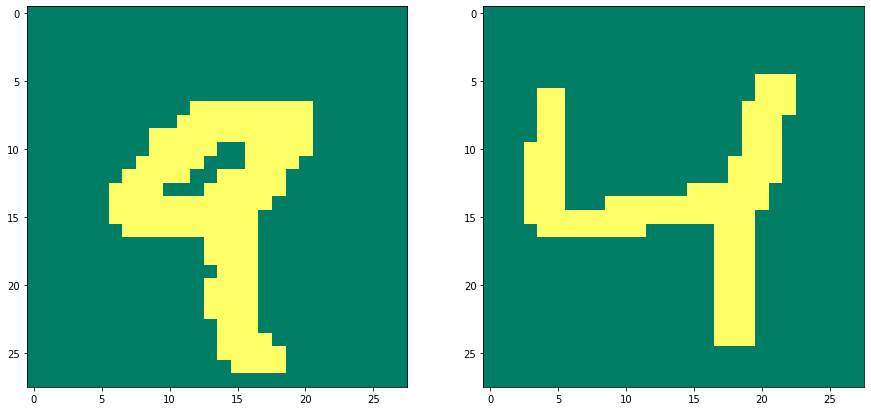

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7.5))
ax[0].imshow(data[0], interpolation='None', cmap='summer')
ax[1].imshow(data[1], interpolation='None', cmap='summer')
plt.show()

In [4]:
N = lambda: 0 # sizes
I = lambda: 0 # indices

def train_hopfield_weights(data, weights):
    # data: [d x rows x cols] data to train
    # weights: [rows*cols x rows*cols] input matrix (zeroes)
    data = data.reshape((-1, 1, data.shape[1]*data.shape[2])) # vectorize
    N.data = data.shape[0] # Number of patterns
    
    for dd in range(N.data):
        w_update = data[dd].T * data[dd]
        weights += w_update

    np.fill_diagonal(weights, 0) # Removes self-connections
    return (weights.astype(np.float32))


def energy(x, w):
    # x: [1 x N] data vector
    # w: [N x N] hopfield net weight matrix.
    energy = -x.dot(w).dot(x.T)
    return energy

def corrupt_input(image_to_corrupt, bernouli_noise_probability = 0.1, mask_value = -1, mask_matrix=np.zeros((2,2))):
    noise_image = (-1*np.random.binomial(1, bernouli_noise_probability, (image_to_corrupt.shape[0], image_to_corrupt.shape[1]))).astype(np.float32)
    noise_image[noise_image==0] = 1
    corrupted_image = noise_image * image_to_corrupt

    return corrupted_image    

## Train

In [5]:
N.neurons = data.shape[1] * data.shape[2]
weights = np.zeros((N.neurons, N.neurons)).astype(np.float32)
weights = train_hopfield_weights(data, weights)

## Randomly corrupt image

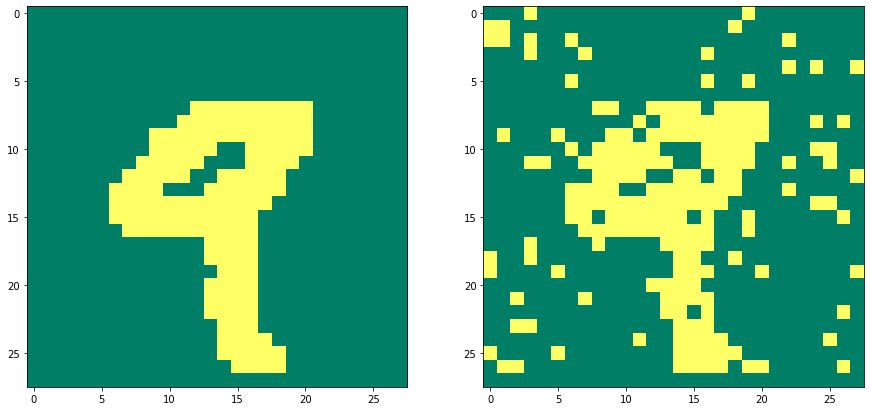

In [14]:
image = data[0]
corrupted_image = corrupt_input(image, bernouli_noise_probability=0.1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7.5))
ax[0].imshow(image, interpolation='None', cmap='summer')
ax[1].imshow(corrupted_image, interpolation='None', cmap='summer')
plt.show()


## Restore image

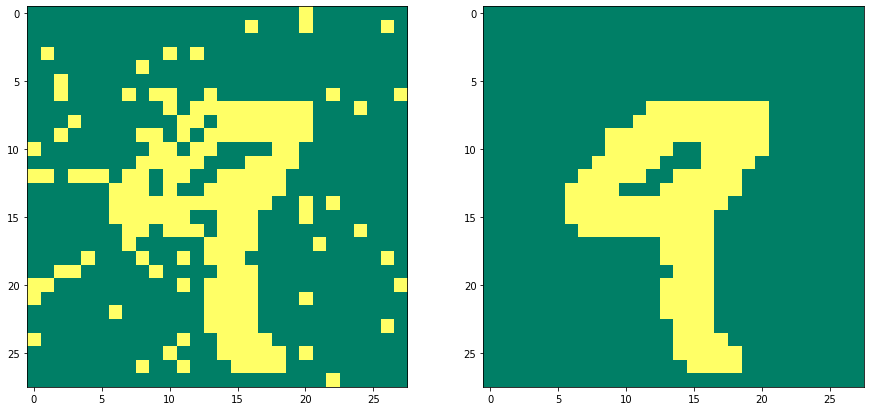

In [12]:
N.iterations = 5000

energy_vec = np.zeros((1,N.iterations))
cleaned_image = np.copy(corrupted_image).reshape(1,784)
for nn in range(N.iterations):
    energy_vec[0,nn] = energy(cleaned_image, weights) # compute energy
    I.index_to_clean = np.random.randint(N.neurons) # take random neuron
    cleaned_image[0,I.index_to_clean] = np.sign(cleaned_image.dot(weights[:,I.index_to_clean]))

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 7.5))
ax[0].imshow(corrupted_image, interpolation='None', cmap='summer')
ax[1].imshow(np.reshape(cleaned_image, (28,28)), interpolation='None', cmap='summer')
plt.show()

## Plot energy during recovery

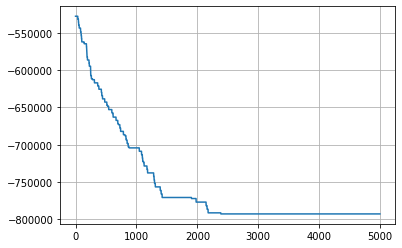

In [13]:
plt.plot(energy_vec.T)
plt.grid('on')
plt.show()